In [5]:
import pandas as pd

In [6]:
url = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv"
data = pd.read_csv(url, parse_dates=['LoadDttm'])

In [7]:
# Select the date for Dunn County from the full data.
dc = data.groupby('NAME').get_group('Dunn')

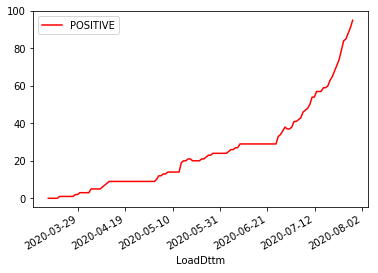

In [8]:
dc.plot(x='LoadDttm',y='POSITIVE',color='red');

Data source: [Wisconsin Department of Health Services](https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-table/)